In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.datasets import load_iris

In [168]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [169]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [170]:
X = df.drop(["species"],axis="columns")
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [171]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [172]:
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [173]:
# scaled = StandardScaler()
# X_train_scaled = scaled.fit_transform(X_train)
# X_test_scaled = scaled.transform(X_test)

In [174]:
#Random Forest
RF = RandomForestClassifier(n_estimators =100,random_state=42)
RF.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [175]:
results=[]

In [176]:
y_pred = RF.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average="macro")
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
results.append(("Random Forest",accuracy,f1))

In [177]:
print(f"Accuracy: {accuracy*100:.2f}")
print("Confusion Matrix:\n",cm)
print("Classification Report:\n",cr)

Accuracy: 100.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Actual')

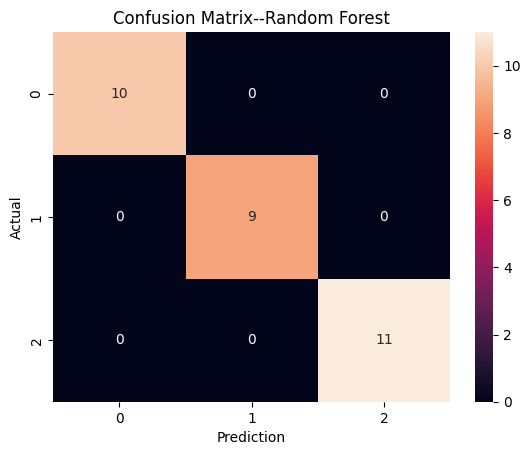

In [178]:
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix--Random Forest")
plt.xlabel("Prediction")
plt.ylabel("Actual")

In [179]:
#Adaboost
AD = AdaBoostClassifier(n_estimators =100,random_state=42)
AD.fit(X_train_scaled,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [180]:
y_pred1 = AD.predict(X_test_scaled)
accuracy1 = accuracy_score(y_test,y_pred)
f11 = f1_score(y_test,y_pred,average="macro")
cm1 = confusion_matrix(y_test,y_pred)
cr1 = classification_report(y_test,y_pred)
results.append(("Adaboost",accuracy1,f11))

In [181]:
print(f"Accuracy: {accuracy1*100:.2f}")
print("Confusion Matrix:\n",cm1)
print("Classification Report:\n",cr1)

Accuracy: 100.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Actual')

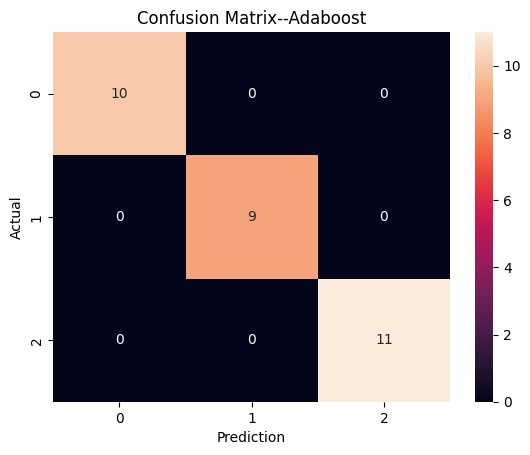

In [182]:
sns.heatmap(cm1,annot=True)
plt.title("Confusion Matrix--Adaboost")
plt.xlabel("Prediction")
plt.ylabel("Actual")

In [183]:
#Gradient Boost
GD = GradientBoostingClassifier(n_estimators =100,random_state=42)
GD.fit(X_train_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [184]:
y_pred2 = GD.predict(X_test_scaled)
accuracy2 = accuracy_score(y_test,y_pred)
f12 = f1_score(y_test,y_pred,average="macro")
cm2 = confusion_matrix(y_test,y_pred)
cr2 = classification_report(y_test,y_pred)
results.append(("GradientBoost",accuracy2,f12))

In [185]:
print(f"Accuracy: {accuracy2*100:.2f}")
print("Confusion Matrix:\n",cm2)
print("Classification Report:\n",cr2)

Accuracy: 100.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Actual')

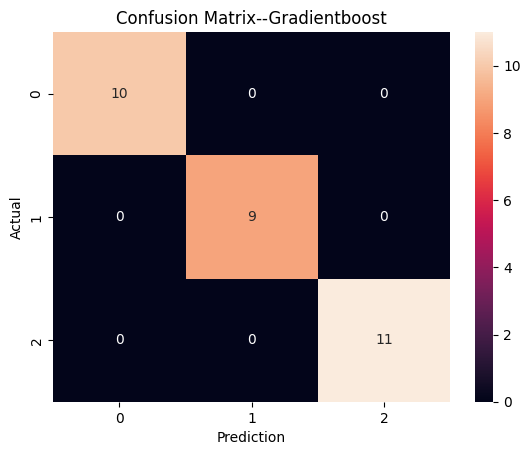

In [186]:
sns.heatmap(cm2,annot=True)
plt.title("Confusion Matrix--Gradientboost")
plt.xlabel("Prediction")
plt.ylabel("Actual")

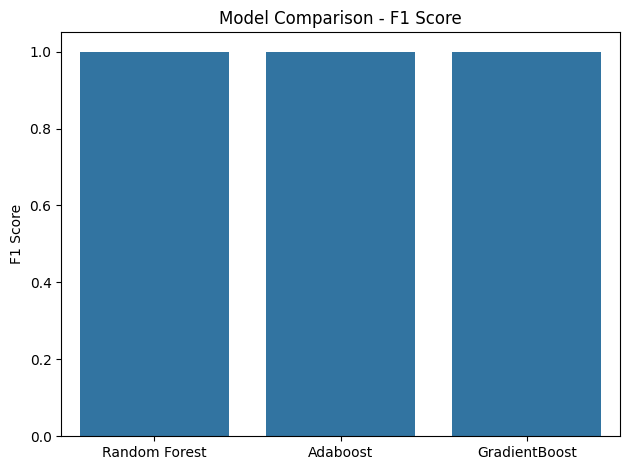

In [187]:
#f1 score
labels = [r[0] for r in results]
f1_scores = [r[2] for r in results]
sns.barplot(x=labels,y=f1_scores)
plt.title("Model Comparison - F1 Score")
plt.ylabel("F1 Score")
plt.tight_layout()

In [188]:
#feature_importance
rf_imp = RF.feature_importances_
ad_imp = AD.feature_importances_
gb_imp = GD.feature_importances_

In [189]:
features = X.columns
importance = pd.DataFrame({
    "Feature": list(features)*3,
    "Importance":list(rf_imp)+list(ad_imp)+list(gb_imp),
    "Model":(["Random Forest"]*len(features)) + (["Adaboost"]*len(features)) + (["Gradient"]*len(features))
})


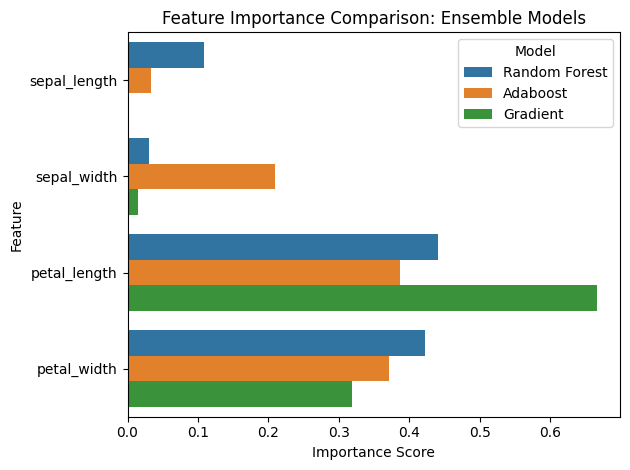

In [190]:
sns.barplot(data=importance,x="Importance",y="Feature",hue="Model")
plt.title("Feature Importance Comparison: Ensemble Models")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()